In [2]:
from knowledgeGraph import KnowledgeGraph, KnowledgeGraphVisualizer
from dataRetrieval import process_input, retrieve_data
from nlpUtils import extract_entities, extract_relationships_from_entities, extract_relationships_directly, text_to_json, text_to_list
from dotenv import load_dotenv
import json

load_dotenv()

True

### Query Processing

In [5]:
# user input
query = process_input()

Yigit Ihlamur


### Data Retrieval and Preprocessing

In [6]:
# The number of web search results returned by Bing
num_web_results = 7

# Get informtaion about the entity
query_data = retrieve_data(query=query, num_results=num_web_results, model="gpt-4-turbo-preview")

### Entities and Relationships Extraction, NLP

##### First approach: Using two prompts, one for extracting relevant entities and one for identifying he underlying relationships between them (for more details, see: extractEntities, extractRelationshipsFromEntities)

In [6]:
context, output = extract_entities(query=query, data=query_data, model="gpt-4-turbo-preview")

context.append(output)

_, output = extract_relationships_from_entities(query=query, context=context, model="gpt-4-turbo-preview")

# generate a json object - the "gpt-3.5-turbo" handle this task well enough
relationships = text_to_json(data=output.content, model="gpt-3.5-turbo")

print(relationships)

{
  "relationships": [
    {"src": "Yigit Ihlamur", "relationship": "co-founder", "tgt": "Vela Partners LLC"},
    {"src": "Yigit Ihlamur", "relationship": "worked at", "tgt": "Google's Cloud division"},
    {"src": "Yigit Ihlamur", "relationship": "studied at", "tgt": "University of Oxford"},
    {"src": "Yigit Ihlamur", "relationship": "advisor", "tgt": "Incubate Fund US"},
    {"src": "Yigit Ihlamur", "relationship": "board observer", "tgt": "Cartken"},
    {"src": "Yigit Ihlamur", "relationship": "board observer", "tgt": "DagKnows"},
    {"src": "Yigit Ihlamur", "relationship": "invested in", "tgt": "Meditopia"},
    {"src": "Yigit Ihlamur", "relationship": "resides in", "tgt": "San Francisco Bay Area"}
  ]
}


##### Second Approach: Using one prompt to directly extract the connections between the entities (for more details, see: extractRelationshipsDirectly)

In [8]:
_, output = extract_relationships_directly(query=query, data=query_data, model="gpt-4-turbo-preview")

# generate a json object
relationships = text_to_json(data=output.content, model="gpt-3.5-turbo")

print(relationships)

{
  "relationships": [
    {"src": "Yigit Ihlamur", "relationship": "co-founder", "tgt": "Vela Partners"},
    {"src": "Yigit Ihlamur", "relationship": "General Partner", "tgt": "Vela Partners"},
    {"src": "Yigit Ihlamur", "relationship": "Advisor", "tgt": "Incubate Fund US"},
    {"src": "Yigit Ihlamur", "relationship": "Board Observer", "tgt": "Cartken"},
    {"src": "Yigit Ihlamur", "relationship": "Board Observer", "tgt": "DagKnows"},
    {"src": "Yigit Ihlamur", "relationship": "attended", "tgt": "University of Oxford"},
    {"src": "Yigit Ihlamur", "relationship": "worked at", "tgt": "Google"},
    {"src": "Yigit Ihlamur", "relationship": "invested in", "tgt": "Meditopia"},
    {"src": "Yigit Ihlamur", "relationship": "located in", "tgt": "San Francisco Bay Area"}
  ]
}


### Building the Knowledge Graph

In [3]:
relationships_list = json.loads(relationships)['relationships']

knowledge_graph = KnowledgeGraph(relationships_list)


##### Visualizing the Knowledge Graph

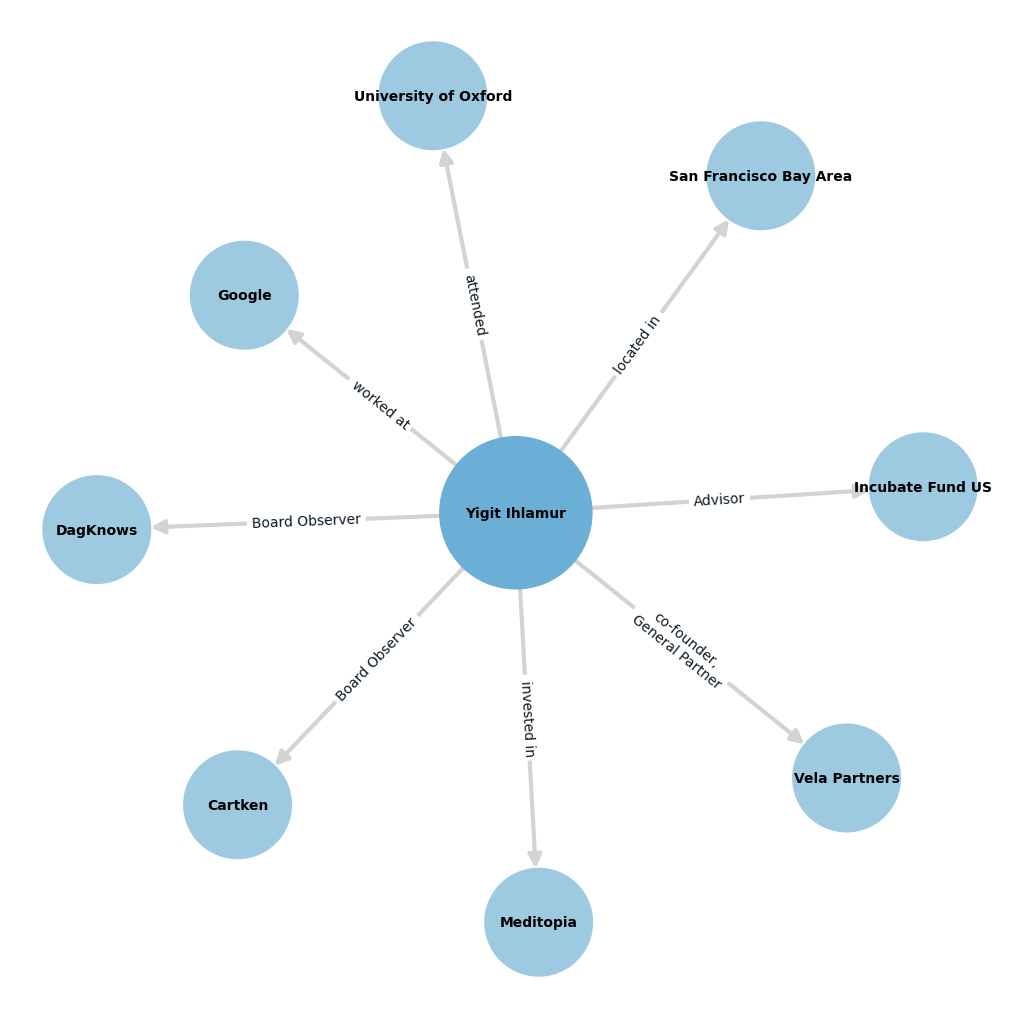

In [17]:
knowledge_graph_visualizer = KnowledgeGraphVisualizer(knowledge_graph)
knowledge_graph_visualizer.visualize(highlight_entities=[query])

##### Visualizing only part of the Knowledge Graph

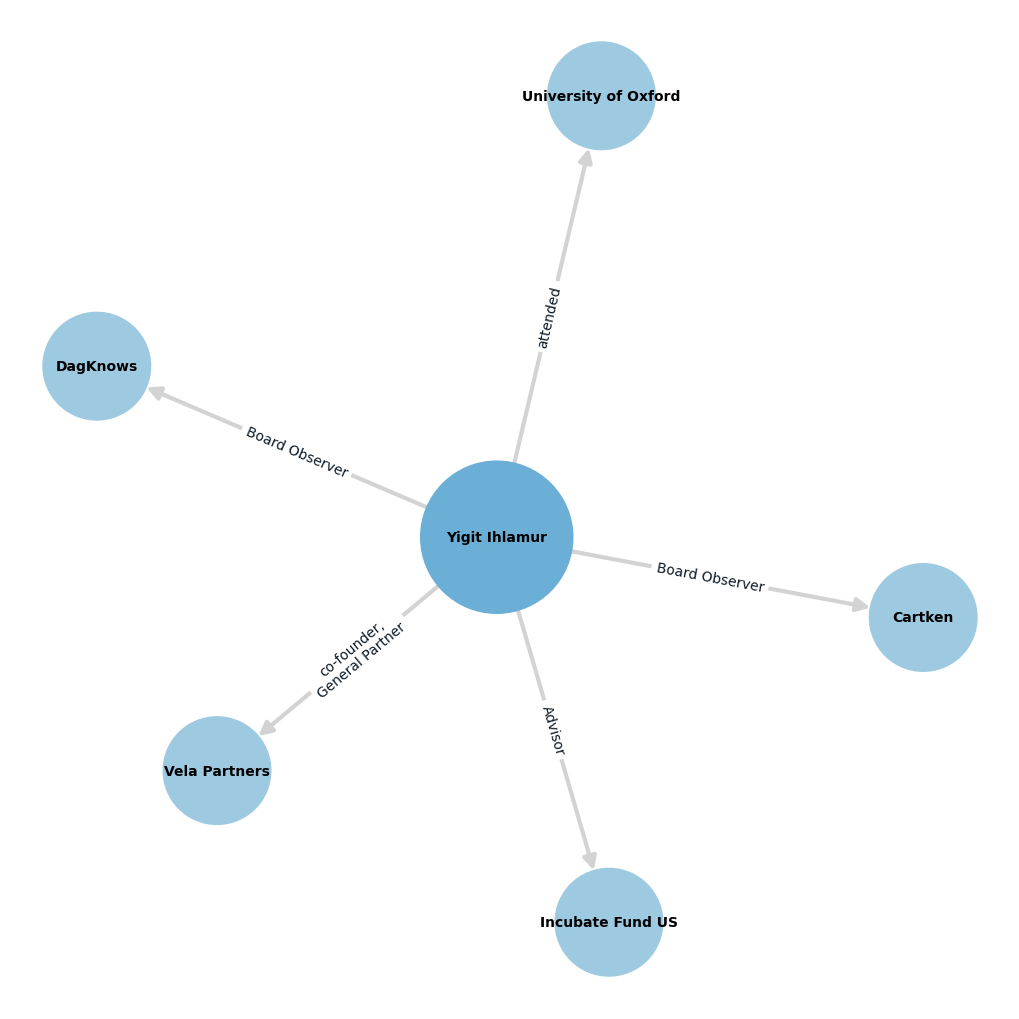

In [8]:
knowledge_graph_visualizer = KnowledgeGraphVisualizer(knowledge_graph)
knowledge_graph_visualizer.visualize(highlight_entities=[query], num_nodes=6)

##### Output JSON

In [21]:
print(relationships)
# relationships

{
  "relationships": [
    {"src": "Yigit Ihlamur", "relationship": "co-founder", "tgt": "Vela Partners"},
    {"src": "Yigit Ihlamur", "relationship": "General Partner", "tgt": "Vela Partners"},
    {"src": "Yigit Ihlamur", "relationship": "Advisor", "tgt": "Incubate Fund US"},
    {"src": "Yigit Ihlamur", "relationship": "Board Observer", "tgt": "Cartken"},
    {"src": "Yigit Ihlamur", "relationship": "Board Observer", "tgt": "DagKnows"},
    {"src": "Yigit Ihlamur", "relationship": "attended", "tgt": "University of Oxford"},
    {"src": "Yigit Ihlamur", "relationship": "worked at", "tgt": "Google"},
    {"src": "Yigit Ihlamur", "relationship": "invested in", "tgt": "Meditopia"},
    {"src": "Yigit Ihlamur", "relationship": "located in", "tgt": "San Francisco Bay Area"}
  ]
}
